In [192]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf
import numpy as np
import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns


In [193]:
# params
dtfrom = "2014-1-1" #dt.date(2014,1,1)
dtto = "2017-1-1" #dt.date(2017,1,1)


In [194]:
#data = pd.read_csv("..\data\coloane,-macau-air-quality.csv",)
data = pd.read_csv("..\data\parque-central da taipa, macau-air-quality.csv",)
data.date=pd.to_datetime(data.date)
data=data.sort_values('date',ascending=False)
data.index=data.date
data.pop('date')

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
"""
mapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))
data.rename(columns=mapper)
"""
for c in data.columns:
    data[c]= pd.to_numeric(data[c], errors='coerce')
    

date
2021-03-01   2021-03-01
2021-02-28   2021-02-28
2021-02-27   2021-02-27
2021-02-26   2021-02-26
2021-02-25   2021-02-25
                ...    
2014-06-29   2014-06-29
2014-06-28   2014-06-28
2014-06-27   2014-06-27
2014-06-26   2014-06-26
2014-06-25   2014-06-25
Name: date, Length: 2027, dtype: datetime64[ns]

'\nmapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))\ndata.rename(columns=mapper)\n'

In [195]:
if False:
    ProfileReport(data)

<AxesSubplot:xlabel='date'>

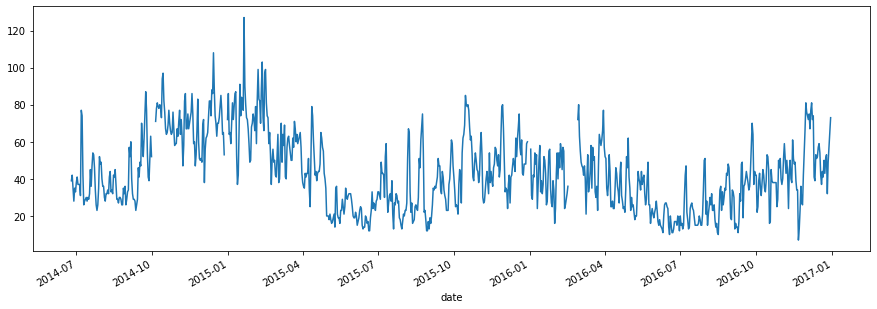

In [199]:
polluant='pm10'
pastpolluant='past'+polluant
df= data[(data.index > dtfrom) & (data.index <= dtto)].copy()

fig,axs=plt.subplots(figsize=(15,5))
df[polluant].plot(ax=axs)
pastpolluants=[]
for pol in data.columns:
    pastpolluants.append( 'past'+pol)
    df[pastpolluants[-1]]=data[pol].shift(1)

<AxesSubplot:xlabel='pastpm10', ylabel='pm10'>

<AxesSubplot:xlabel='pastpm10', ylabel='pm10'>

0.7465243608021739

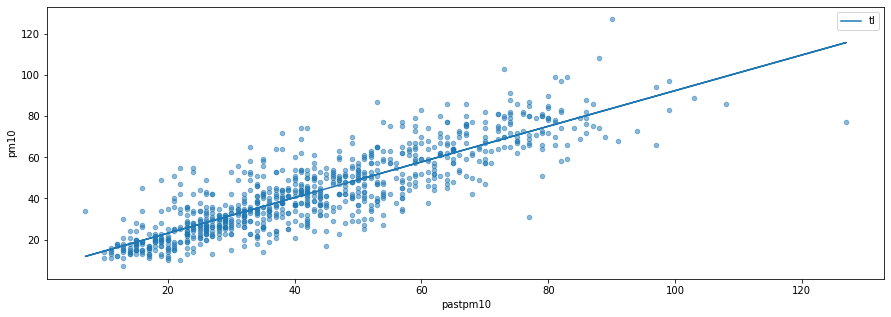

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#regression on polluant self past value

fig,axs= plt.subplots(figsize=(20,10))
regr = linear_model.LinearRegression()
X= df[[pastpolluant,polluant]].dropna(how='any')
X.plot(kind='scatter',ax=axs, x = pastpolluant, y = polluant, figsize=(15,5), alpha =0.5)
y = X.pop(polluant)
regression = regr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
trendln = pd.DataFrame({'tl':regression.predict(X.values.reshape(-1,1)).reshape(1,-1)[0]},index=X.values.reshape(1,-1)[0])
trendln.plot(ax=axs)

regression.score(X, y)


In [209]:
# regression on all past polluants 
regr = linear_model.LinearRegression()

#df[pastpolluants+[polluant]].head()
X= df[pastpolluants+[polluant]].dropna(how='any')
y= pd.DataFrame(X.pop(polluant))
#sns.pairplot(X[pastpolluants+[polluant]])

array([[ 0.29320923,  0.56232692, -0.04646948, -0.45285112, -0.88439383,
         0.76243944]])

0.8988966548576821

<AxesSubplot:xlabel='date'>

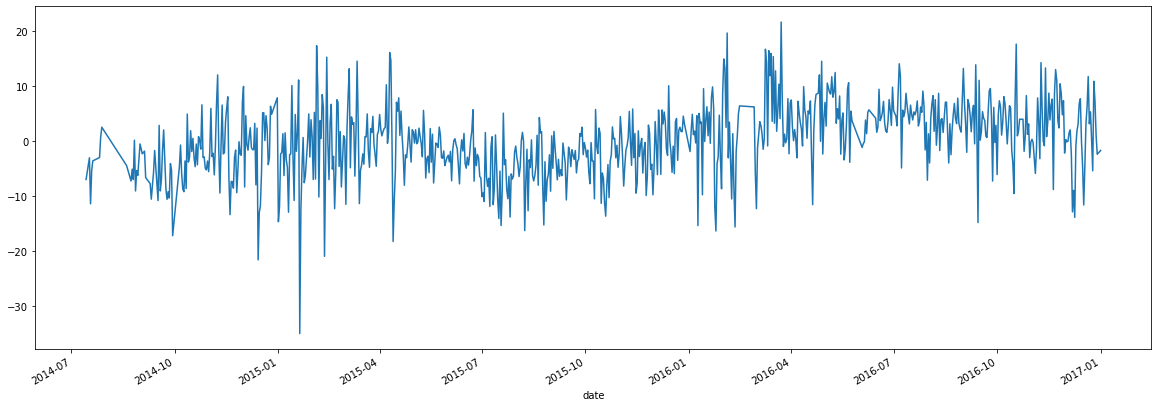

In [210]:
#X.plot(kind='scatter',ax=axs, x = pastpolluants, y =polluant, figsize=(15,5), alpha =0.5)
#y = X.pop(polluant)
regression = regr.fit(X.values,y.values.reshape(-1,1))
y['predicted'] = regression.predict(X.values).reshape(1,-1)[0]
#trendln.plot(ax=axs)
regression.coef_
regression.score(X, y[polluant])
(y['predicted']-y[polluant]).plot(figsize=(20,7))

# add weather features

In [211]:
smgdata = pd.read_csv("..\data\smg-weather-jan2010-feb2021.csv",)
smgdata=smgdata[smgdata.columns[:-3]]
smgdata.date=pd.to_datetime(smgdata.date)
smgdata=smgdata.sort_values('date',ascending=False)
smgdata.index=smgdata.date
smgdata.pop('date')

smgdata.columns = smgdata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

"""
mapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))
data.rename(columns=mapper)
"""
for c in smgdata.columns:
    smgdata[c]= pd.to_numeric(smgdata[c], errors='coerce')

date
2021-02-23   2021-02-23
2021-02-22   2021-02-22
2021-02-21   2021-02-21
2021-02-20   2021-02-20
2021-02-19   2021-02-19
                ...    
2010-01-05   2010-01-05
2010-01-04   2010-01-04
2010-01-03   2010-01-03
2010-01-02   2010-01-02
2010-01-01   2010-01-01
Name: date, Length: 4072, dtype: datetime64[ns]

'\nmapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))\ndata.rename(columns=mapper)\n'

In [212]:
smgdata.info()
smgdata.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072 entries, 2021-02-23 to 2010-01-01
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pressure    4072 non-null   float64
 1   temp_max    4072 non-null   float64
 2   temp_mean   4072 non-null   float64
 3   temp_min    4072 non-null   float64
 4   dew_mean    4072 non-null   float64
 5   humidity    4072 non-null   int64  
 6   insolation  4066 non-null   float64
 7   wind_dir    0 non-null      float64
 8   wind_speed  4072 non-null   int64  
 9   rain        3499 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 349.9 KB


Index(['pressure', 'temp_max', 'temp_mean', 'temp_min', 'dew_mean', 'humidity',
       'insolation', 'wind_dir', 'wind_speed', 'rain'],
      dtype='object')

In [213]:
smgdata.pop('wind_dir')
sum(smgdata.isnull().any(axis=1))  # missing data ?
smgdata.isnull()[smgdata.columns].sum()

date
2021-02-23   NaN
2021-02-22   NaN
2021-02-21   NaN
2021-02-20   NaN
2021-02-19   NaN
              ..
2010-01-05   NaN
2010-01-04   NaN
2010-01-03   NaN
2010-01-02   NaN
2010-01-01   NaN
Name: wind_dir, Length: 4072, dtype: float64

579

pressure        0
temp_max        0
temp_mean       0
temp_min        0
dew_mean        0
humidity        0
insolation      6
wind_speed      0
rain          573
dtype: int64

In [214]:
df = pd.merge(data,smgdata,on='date').copy()
df= df[(df.index > dtfrom) & (df.index <= dtto)]
df

,pm25,pm10,o3,no2,so2,co,pressure,temp_max,temp_mean,temp_min,dew_mean,humidity,insolation,wind_speed,rain
date,,,,,,,,,,,,,,,
2017-01-01,NaN,53.0,28.0,36.0,4.0,6.0,1021.8,22.4,18.7,16.2,15.5,82,4.7,7,0.0
2016-12-31,143.0,NaN,NaN,NaN,NaN,NaN,1022.9,21.8,17.3,13.8,11.3,69,7.6,10,0.0
2016-12-30,138.0,73.0,39.0,45.0,6.0,6.0,1024.4,19.7,15.4,12.6,7.0,58,3.0,14,0.0
2016-12-29,124.0,65.0,32.0,33.0,7.0,5.0,1024.4,17.7,14.4,12.2,5.3,55,2.1,18,0.0
2016-12-28,107.0,57.0,32.0,20.0,5.0,5.0,1023.2,15.5,12.8,9.4,5.2,60,0.7,22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-29,18.0,35.0,15.0,10.0,NaN,10.0,1005.1,33.0,28.7,26.8,26.0,85,6.0,9,4.2
2014-06-28,15.0,28.0,9.0,8.0,NaN,9.0,1004.6,32.9,29.6,27.0,26.0,81,11.9,7,0.0
2014-06-27,37.0,35.0,15.0,8.0,NaN,10.0,1005.9,33.0,29.5,26.9,26.2,83,11.1,6,0.0


In [243]:
X=df[[c for c in df.columns if not c in ('wind_dir','rain')]].copy()
#for c in X.columns[:6]:
#    X[c]=X[c].apply(np.log1p)
X['target']=X[polluant].shift(-1)
X=X.dropna(how='any')

In [244]:
X.describe()
X.info()

,pm25,pm10,o3,no2,so2,co,pressure,temp_max,temp_mean,temp_min,dew_mean,humidity,insolation,wind_speed,target
count,821.000000,821.000000,821.000000,821.000000,821.00000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,78.634592,43.876979,34.991474,18.283800,3.43849,6.571255,1013.427284,26.225213,23.067235,20.880877,19.711693,82.364190,4.642144,10.741778,43.848965
std,42.849601,20.269783,22.004516,7.878101,2.43254,2.135382,6.551283,5.653325,5.413050,5.406131,6.132263,10.749254,4.058151,4.668950,20.291872
min,1.000000,7.000000,3.000000,5.000000,1.00000,1.000000,993.300000,6.400000,3.600000,1.600000,-3.800000,35.000000,0.000000,2.000000,7.000000
25%,47.000000,27.000000,19.000000,12.000000,2.00000,5.000000,1008.400000,21.700000,18.600000,16.700000,15.600000,77.000000,0.200000,7.000000,27.000000
50%,80.000000,42.000000,29.000000,17.000000,3.00000,6.000000,1013.200000,27.500000,24.600000,22.500000,21.500000,84.000000,4.400000,10.000000,42.000000
75%,108.000000,58.000000,44.000000,23.000000,5.00000,8.000000,1018.300000,31.000000,27.500000,25.400000,25.000000,90.000000,8.500000,13.000000,58.000000
max,186.000000,127.000000,134.000000,59.000000,24.00000,15.000000,1035.000000,36.600000,32.600000,29.800000,26.900000,100.000000,12.700000,34.000000,127.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 821 entries, 2016-12-30 to 2014-07-15
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pm25        821 non-null    float64
 1   pm10        821 non-null    float64
 2   o3          821 non-null    float64
 3   no2         821 non-null    float64
 4   so2         821 non-null    float64
 5   co          821 non-null    float64
 6   pressure    821 non-null    float64
 7   temp_max    821 non-null    float64
 8   temp_mean   821 non-null    float64
 9   temp_min    821 non-null    float64
 10  dew_mean    821 non-null    float64
 11  humidity    821 non-null    int64  
 12  insolation  821 non-null    float64
 13  wind_speed  821 non-null    int64  
 14  target      821 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 102.6 KB


In [245]:
if False:
    ProfileReport(X)

array([[ 0.29550821,  0.51208749, -0.08647018, -0.44128869, -0.80724644,
         1.03325607,  0.17520353,  0.27491725,  1.63447641,  0.33147905,
        -1.90217393,  0.14974048, -0.15870925, -0.24882786]])

0.9122320821323512

<AxesSubplot:title={'center':'residuals'}, xlabel='date'>

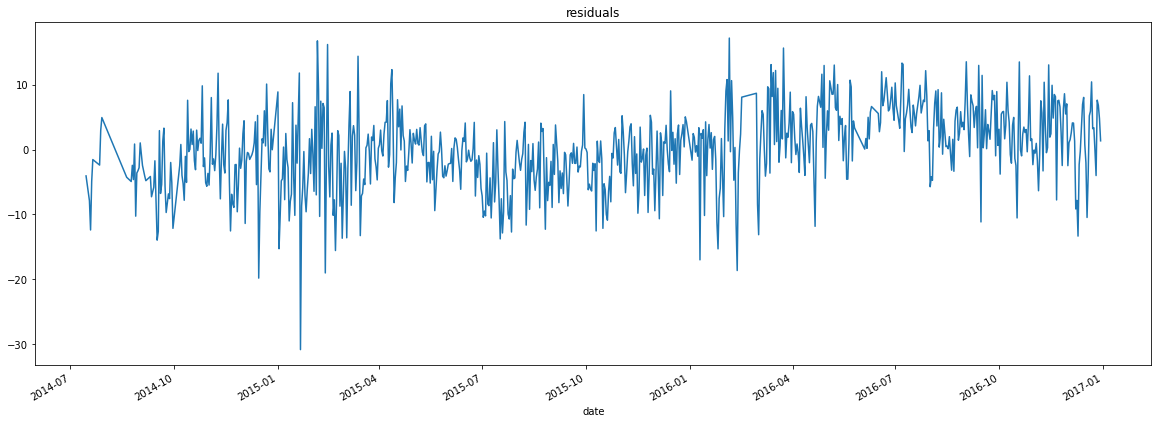

In [246]:
y=pd.DataFrame(X.pop('target'))
regression = regr.fit(X.values,y.values.reshape(-1,1))
y['predicted'] = regression.predict(X.values).reshape(1,-1)[0]
#trendln.plot(ax=axs)
regression.coef_
regression.score(X, y['target'])
(y['predicted']-y['target']).plot(title="residuals", figsize=(20,7))

'"\nX2[\'dow\']=X2.index.map(lambda x: dt.datetime.strftime(x,"%a"))\nX2= pd.merge(X2,pd.get_dummies(X2[\'dow\']),on=\'date\')\ndel X2[\'dow\']\n'

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     905.7
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:08:00   Log-Likelihood:                -2649.6
No. Observations:                 821   AIC:                             5319.
Df Residuals:                     811   BIC:                             5366.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co             1.0282      0.143      7.167      0.0

<AxesSubplot:title={'center':'residuals'}, xlabel='date'>

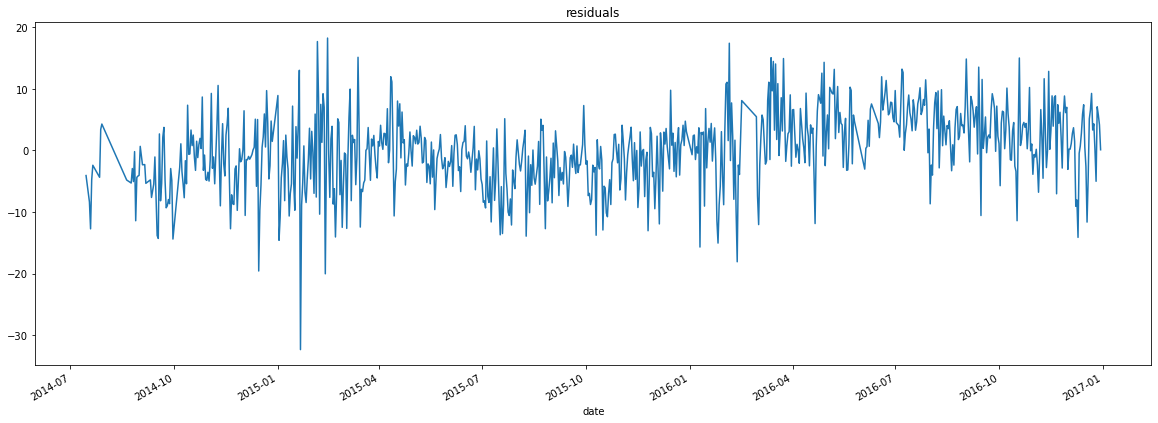

In [253]:
import statsmodels.api as sm
#[['pm25','pm10','o3']]
#[['pm25','pm10','o3','no2','so2','co',]]
X2 = sm.add_constant(X[X.columns.difference(['temp_max','temp_mean','temp_max','humidity','insolation','pressure'])], prepend=False)
""""
X2['dow']=X2.index.map(lambda x: dt.datetime.strftime(x,"%a"))
X2= pd.merge(X2,pd.get_dummies(X2['dow']),on='date')
del X2['dow']
"""

mod = sm.OLS(y['target'], X2)
res = mod.fit()
print(res.summary())

y['predicted']=res.predict(X2)
(y['predicted']-y['target']).plot(title="residuals",figsize=(20,7))

In [240]:
PCA
ACF PACF ?
VAR ? 

R2 w.r.t calibration 
predictive power ?
over further time scales ?
